## gradient_1d

In [1]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [2]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

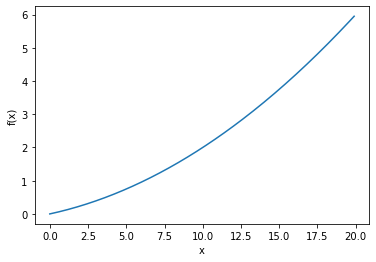

In [4]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0,20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [5]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


## gradient_2d

In [6]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [7]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [8]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## gradient

In [9]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
        
    return grad

In [10]:
print(numerical_gradient(function_2, np.array([3.0,4.0])))
print(numerical_gradient(function_2, np.array([0.0,2.0])))
print(numerical_gradient(function_2, np.array([3.0,0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


## gradient_descent

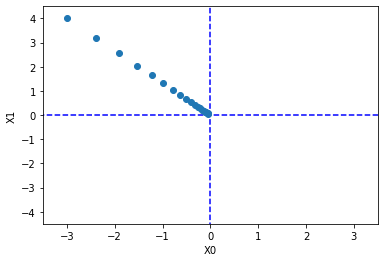

In [11]:
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [13]:
#학습률이 너무 큰 예
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr = 10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [14]:
#학습률이 너무 작은 예
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr = 1e-10, step_num=100)

array([-2.99999994,  3.99999992])